In [23]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [24]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [25]:
# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [26]:
# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [27]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

In [28]:
# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [29]:
# do prediction on test data
predictions = emotion_model.predict(test_generator)

113/113 [==============================] - 24s 176ms/step


-----------------------------------------------------------------
[[112  15 109 277 151 193 101]
 [ 19   2  11  21  23  23  12]
 [146  13  91 293 140 222 119]
 [250  16 206 478 276 336 212]
 [152  23 142 333 198 241 144]
 [158  11 141 317 219 246 155]
 [ 96   6  96 229 160 145  99]]


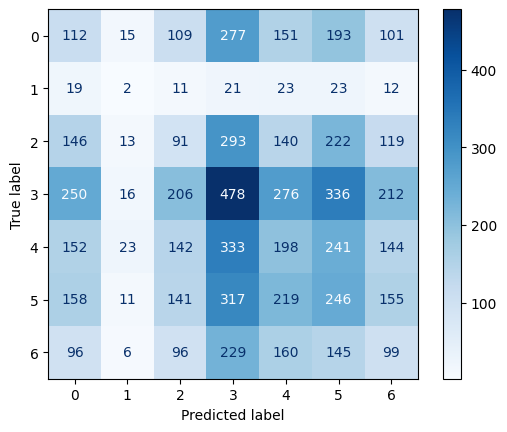

In [30]:
# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [33]:
# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.12      0.12      0.12       958
           1       0.02      0.02      0.02       111
           2       0.11      0.09      0.10      1024
           3       0.25      0.27      0.26      1774
           4       0.17      0.16      0.17      1233
           5       0.17      0.20      0.19      1247
           6       0.12      0.12      0.12       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178

